<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/2021_22_NBA_Player_Stats_Per_Game_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021-22 NBA Player Stats: Per Game EDA
## Web Scraping
Retrieve the "2018-19 NBA Player Stats: Per Game" data from http://www.basketball-reference.com/.

In [1]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
html = pd.read_html(url, header=0)
df = html[0]

# Data Cleaning
raw = df.drop(df[df.Age == 'Age'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


# Data Cleaning

## Shape

In [3]:
raw.shape

(812, 30)

In [4]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


## Check Missing Values

In [5]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%       15
3P         0
3PA        0
3P%       72
2P         0
2PA        0
2P%       28
eFG%      15
FT         0
FTA        0
FT%       97
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

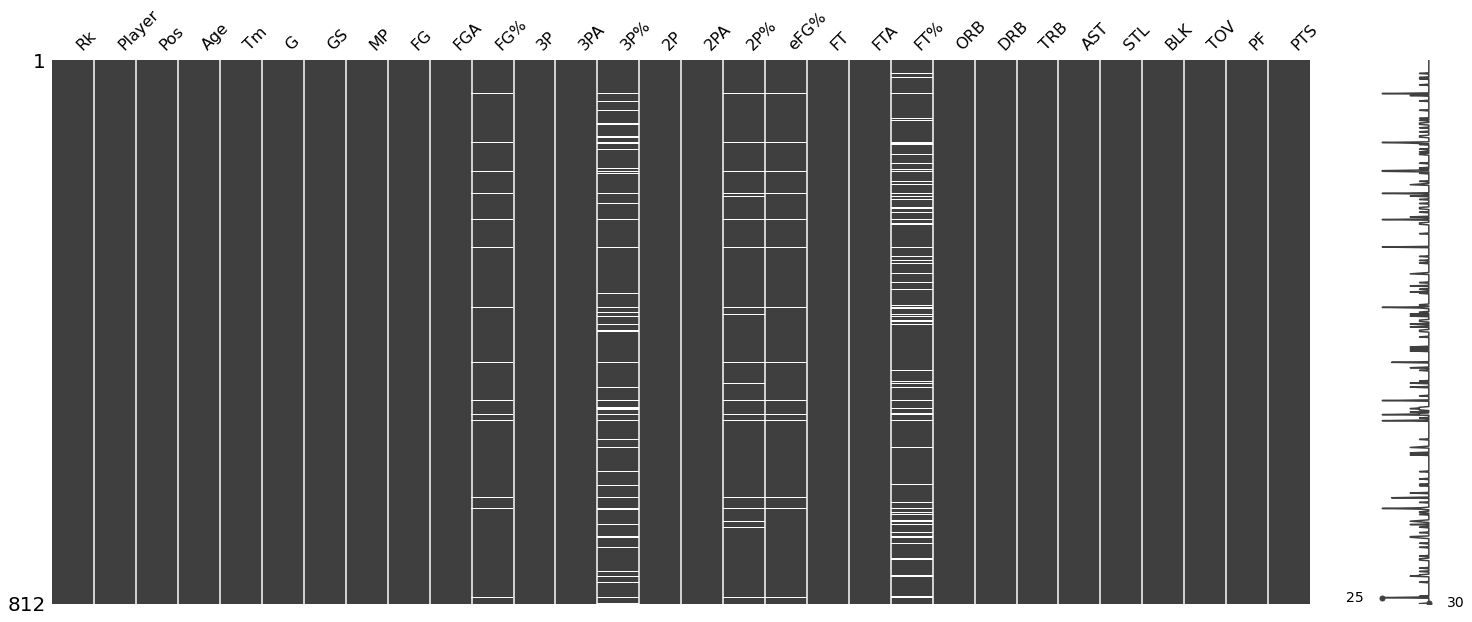

In [6]:
missingno.matrix(raw)

## Replace Missing Values with 0

In [7]:
df = raw.fillna(0)

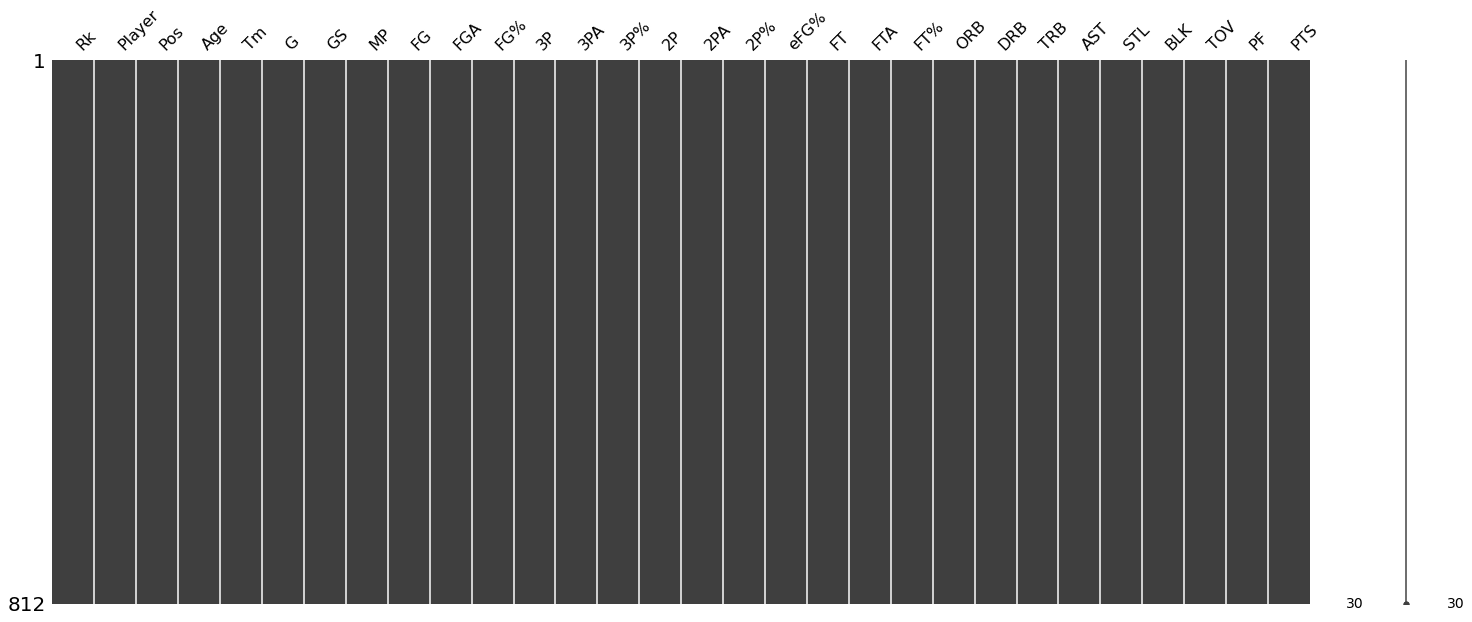

In [8]:
missingno.matrix(df)

## Drop Rk (Rank) - less significant feature

In [9]:
df = df.drop(['Rk'], axis=1)
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

# Transfer data to CSV file

In [10]:
df.to_csv('nba2k22.csv', index=False)

In [11]:
ls

nba2k22.csv  sample_data/


# Exploratory Data Analysis

In [12]:
df = pd.read_csv('nba2k22.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


## Data types per column

In [13]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

## Show numerical features

In [14]:
df.select_dtypes('number').head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,22,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,28,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,24,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,21,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,36,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [15]:
numerical_features = df.select_dtypes('number').columns.values
print(numerical_features)

['Age' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA' '3P%' '2P' '2PA' '2P%'
 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST' 'STL' 'BLK' 'TOV' 'PF'
 'PTS']


## Show classification features

In [16]:
df.select_dtypes('object').head()

,Player,Pos,Tm
0,Precious Achiuwa,C,TOR
1,Steven Adams,C,MEM
2,Bam Adebayo,C,MIA
3,Santi Aldama,PF,MEM
4,LaMarcus Aldridge,C,BRK


In [17]:
classification_features = df.select_dtypes('object').columns.drop('Player').values
print(classification_features)

['Pos' 'Tm']


# Guide Questions
Conditional Selection

- Which player scored the most Points (PTS) Per Game? (Entire row)
- What team is the player from?
- Which position is the player playing as?
- How many games did the player played in the season?
- Which player scored more than 20 Points (PTS) Per Game?
- Which player had the highest 3-Point Field Goals Per Game (3P) ?
- Which player had the highest Assists Per Game (AST) ?
- Which player scored the highest (PTS) in the Golden State Warriors?
- Of the 5 positions, which position scores the most points?

## Which player scored the most Points (PTS) Per Game? (Entire row)

In [18]:
max_pts_player = df[df['PTS'] == df['PTS'].max()]
max_pts_player

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
206,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,...,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6


## What team is the player from?

In [19]:
max_pts_player['Tm']

206    PHI
Name: Tm, dtype: object

## Which position is the player playing as?

In [20]:
max_pts_player['Pos']

206    C
Name: Pos, dtype: object

## How many games did the player played in the season?

In [21]:
max_pts_player['G']

206    68
Name: G, dtype: int64

## Which player scored more than 20 Points (PTS) Per Game?

In [22]:
df[df['PTS'] > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
15,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,...,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
32,LaMelo Ball,PG,20,CHO,75,75,32.3,7.2,16.7,0.429,...,0.872,1.4,5.2,6.7,7.6,1.6,0.4,3.3,3.2,20.1
48,Bradley Beal,SG,28,WAS,40,40,36.0,8.7,19.3,0.451,...,0.833,1.0,3.8,4.7,6.6,0.9,0.4,3.4,2.4,23.2
70,Devin Booker,SG,25,PHO,68,68,34.5,9.7,20.9,0.466,...,0.868,0.7,4.4,5.0,4.8,1.1,0.4,2.4,2.6,26.8
78,Miles Bridges,PF,23,CHO,80,80,35.5,7.5,15.2,0.491,...,0.802,1.1,5.9,7.0,3.8,0.9,0.8,1.9,2.4,20.2
93,Jaylen Brown,SF,25,BOS,66,66,33.6,8.7,18.4,0.473,...,0.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6
106,Jimmy Butler,SF,32,MIA,57,57,33.9,7.0,14.5,0.480,...,0.870,1.8,4.1,5.9,5.5,1.6,0.5,2.1,1.5,21.4
159,Stephen Curry,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
160,Anthony Davis,C,28,LAL,40,40,35.1,9.3,17.4,0.532,...,0.713,2.7,7.2,9.9,3.1,1.2,2.3,2.1,2.4,23.2
167,DeMar DeRozan,PF,32,CHI,76,76,36.1,10.2,20.2,0.504,...,0.877,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9


## Which player had the highest 3-Point Field Goals Per Game (3P) ?

In [23]:
max_3pts_player = df[df['3P'] == df['3P'].max()]
max_3pts_player

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5


## Which player had the highest Assists Per Game (AST) ?

In [24]:
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
582,Chris Paul,PG,36,PHO,65,65,32.9,5.6,11.3,0.493,...,0.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7


**GroupBy() function**
## Which player scored the highest (PTS) in the Golden State Werriors?

In [25]:
GSW = df.groupby('Tm').get_group('GSW')
GSW.head().sort_values(by=['PTS'], ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
266,Draymond Green,PF,31,GSW,46,44,28.9,2.9,5.6,0.525,...,0.659,1.0,6.3,7.3,7.0,1.3,1.1,3.0,3.0,7.5
62,Nemanja Bjelica,C,33,GSW,71,0,16.1,2.3,4.8,0.468,...,0.728,0.9,3.3,4.1,2.2,0.6,0.4,1.2,1.8,6.1
127,Chris Chiozza,PG,26,GSW,34,1,10.9,0.7,2.4,0.296,...,0.667,0.3,0.8,1.1,1.9,0.4,0.0,0.9,0.9,2.0
185,Jeff Dowtin,PG,24,GSW,4,0,7.0,0.8,1.5,0.500,...,0.000,0.3,1.5,1.8,0.8,0.0,0.3,0.3,0.5,1.5


In [26]:
GSW[GSW['PTS'] == GSW['PTS'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5


## Of the 5 positions, which position scores the most points?

We first group players by their positions.

In [27]:
POS = df.groupby('Pos')
POS['PTS'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,130.0,7.690769,5.621146,0.0,3.775,6.95,9.550,30.6
C-PF,2.0,12.850000,8.555992,6.8,9.825,12.85,15.875,18.9
PF,152.0,7.737500,6.036498,0.0,3.300,6.50,10.150,29.9
PF-SF,1.0,8.500000,NaN,8.5,8.500,8.50,8.500,8.5
PG,156.0,8.292308,6.684257,0.0,3.300,6.30,11.525,28.4
PG-SG,1.0,22.000000,NaN,22.0,22.000,22.00,22.000,22.0
SF,157.0,7.296178,6.206716,0.0,3.000,5.80,9.800,30.3
SF-SG,5.0,8.660000,6.429852,3.1,3.800,7.30,10.100,19.0
SG,199.0,7.810553,6.059656,0.0,2.950,6.20,11.250,26.8


In [28]:
# Drop combination positions
positions = ['C','PF','SF','PG','SG']
POS = df[df['Pos'].isin(positions)]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [29]:
POS.groupby('Pos').describe()

Age                                                          G  \
     count       mean       std   min   25%   50%    75%   max  count   
Pos                                                                     
C    130.0  26.746154  4.286831  19.0  23.0  26.0  29.75  41.0  130.0   
PF   152.0  25.986842  4.138315  19.0  23.0  25.0  29.00  37.0  152.0   
PG   156.0  26.538462  4.423376  20.0  23.0  25.0  30.00  36.0  156.0   
SF   157.0  25.515924  3.578076  19.0  23.0  25.0  28.00  38.0  157.0   
SG   199.0  25.613065  3.850230  19.0  23.0  25.0  28.00  40.0  199.0   

                ...     PF         PTS                                        \
          mean  ...    75%  max  count      mean       std  min    25%   50%   
Pos             ...                                                            
C    40.361538  ...  2.575  3.6  130.0  7.690769  5.621146  0.0  3.775  6.95   
PF   37.782895  ...  2.300  3.8  152.0  7.737500  6.036498  0.0  3.300  6.50   
PG   34.384615  ...  2.025  3.8  156.0  8.292308  6.684257  0.0  3.300  6.30   
SF   35.171975  ...  2.000  3.7  157.0  7.296178  6.206716  0.0  3.000  5.80   
SG   35.592965  ...  1.950  5.0  199.0  7.810553  6.059656  0.0  2.950  6.20   

                   
        75%   max  
Pos                
C     9.550  30.6  
PF   10.150  29.9  
PG   11.525  28.4  
SF    9.800  30.3  
SG   11.250  26.8  

[5 rows x 208 columns]

# Histograms

In [30]:
PTS = df[['Pos', 'PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[ PTS['Pos'].isin(positions) ]

PTS

,Pos,PTS
0,C,9.1
1,C,6.9
2,C,19.1
3,PF,4.1
4,C,12.9
...,...,...
807,PF,6.3
808,PG,28.4
809,C,5.3
810,C,5.2


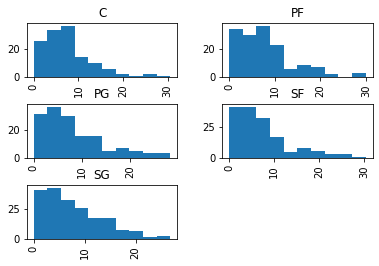

In [31]:
PTS['PTS'].hist(by=PTS['Pos'])
plt.show()

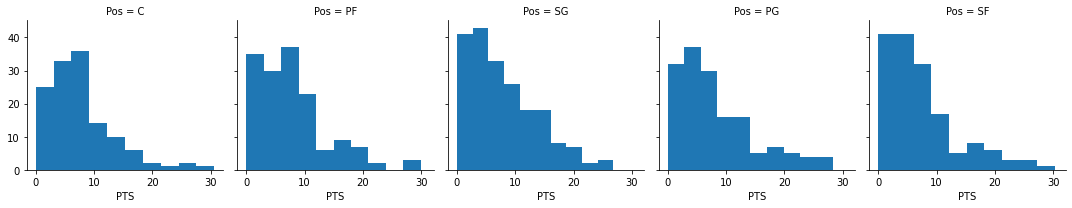

In [32]:
g = sns.FacetGrid(PTS, col='Pos')
g.map(plt.hist, 'PTS')
plt.show()

# BoxPlots

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


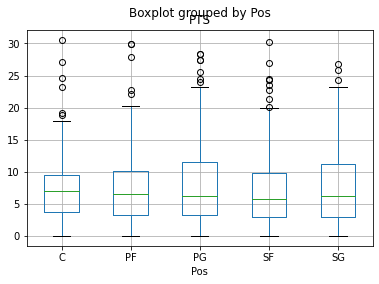

In [33]:
PTS.boxplot(column='PTS', by='Pos')

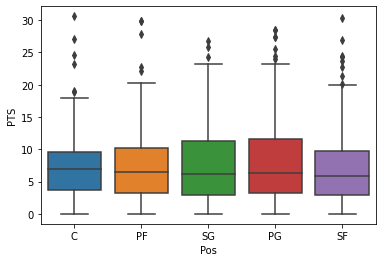

In [34]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS)

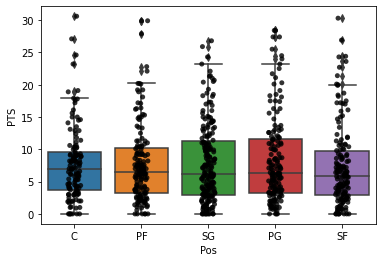

In [35]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

## Correlation Heatmap

In [36]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.042212,0.052232,0.145388,0.087947,0.085564,0.059665,0.121144,0.104885,0.084448,...,0.075038,0.014226,0.124140,0.099501,0.171731,0.072693,0.038176,0.096063,0.127838,0.094685
G,0.042212,1.000000,0.680436,0.620290,0.563977,0.542432,0.311718,0.475981,0.457740,0.372137,...,0.468275,0.293125,0.517411,0.487806,0.387040,0.424368,0.336577,0.424739,0.470319,0.559330
GS,0.052232,0.680436,1.000000,0.751435,0.736394,0.713715,0.226771,0.530903,0.524531,0.226564,...,0.288935,0.354654,0.656365,0.612579,0.563921,0.521898,0.408970,0.617675,0.538844,0.732292
MP,0.145388,0.620290,0.751435,1.000000,0.886895,0.898603,0.299632,0.720450,0.732635,0.417982,...,0.496879,0.357061,0.756131,0.688470,0.728131,0.717810,0.447035,0.771405,0.743587,0.887411
FG,0.087947,0.563977,0.736394,0.886895,1.000000,0.970853,0.355639,0.679117,0.680076,0.352440,...,0.425511,0.383116,0.764754,0.703036,0.707715,0.617590,0.447414,0.811092,0.651883,0.989932
FGA,0.085564,0.542432,0.713715,0.898603,0.970853,1.000000,0.211332,0.764839,0.794470,0.367820,...,0.437638,0.257649,0.697697,0.612265,0.744193,0.637838,0.358791,0.824847,0.616042,0.975918
FG%,0.059665,0.311718,0.226771,0.299632,0.355639,0.211332,1.000000,0.053493,-0.018902,0.221204,...,0.260330,0.436072,0.372291,0.421290,0.109928,0.171141,0.387849,0.199539,0.395070,0.313305
3P,0.121144,0.475981,0.530903,0.720450,0.679117,0.764839,0.053493,1.000000,0.969827,0.550784,...,0.436182,-0.115142,0.359467,0.237293,0.539793,0.506564,0.092254,0.540044,0.381334,0.729547
3PA,0.104885,0.457740,0.524531,0.732635,0.680076,0.794470,-0.018902,0.969827,1.000000,0.470174,...,0.415277,-0.127942,0.369933,0.241032,0.564140,0.518342,0.087548,0.572415,0.386590,0.728704
3P%,0.084448,0.372137,0.226564,0.417982,0.352440,0.367820,0.221204,0.550784,0.470174,1.000000,...,0.437002,-0.042984,0.185199,0.126768,0.254576,0.277578,0.059444,0.230620,0.253234,0.376084


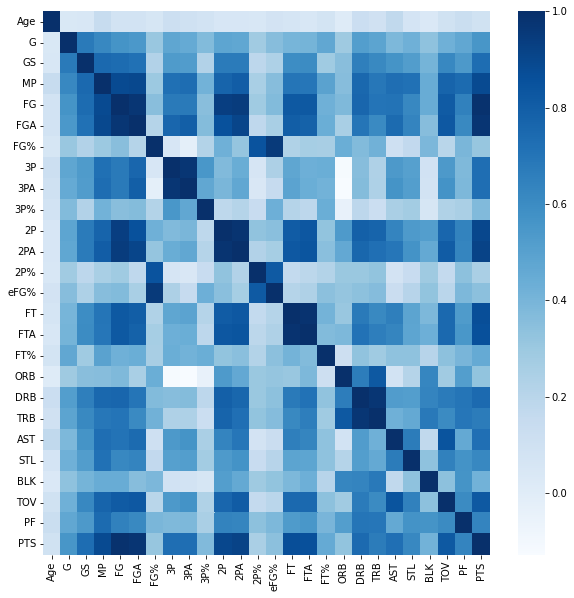

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, cmap='Blues')
plt.show()